# WAV file quality

- arpeggio
- using default buffer
- using 8bit buffer
- decreasing sample_rate

## TODO
- bug: decreasing sample rate makes replay slower
  possible cause: `sample_rate` is not used in `AmplitudeEncoder_short.encode`

In [1]:
# the waveshape module is in the parent directory
import sys
sys.path.append(f'{sys.path[0]}/..')

MonoAudioBuffer, encoder = AmplitudeEncoder (sample rate=44100Hz), contains 16.00s
16 44100


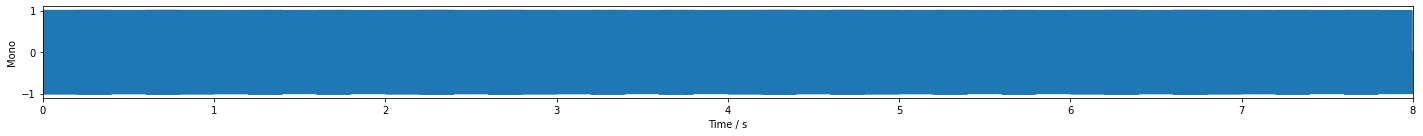

In [2]:
import wavestacker
import numpy as np

def generate_sine_wave(frequency, duration, sample_rate):
    time_array = np.linspace(0, duration, int(sample_rate * duration))
    sine_wave = np.sin(2 * np.pi * frequency * time_array)
    return sine_wave

sample_rate = 44100  # Sample rate in Hz
buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate)

# Generate large arrays of sine waves with different frequencies
frequencies = [440, 880, 220, 880, 440, 220, 1760, 110, 1760, 110] * 4 # repeat 4 times
tone_length = 0.2  # seconds
notes = [generate_sine_wave(freq, tone_length, sample_rate) for freq in frequencies] 
y = np.concatenate(notes)

buffer.add_audio_data(y)
print(buffer)
print(buffer.encoder.bits_per_sample, buffer.sample_rate)
fig, axs = buffer.plot()
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (sample rate=44100Hz), contains 8.00s
8 44100


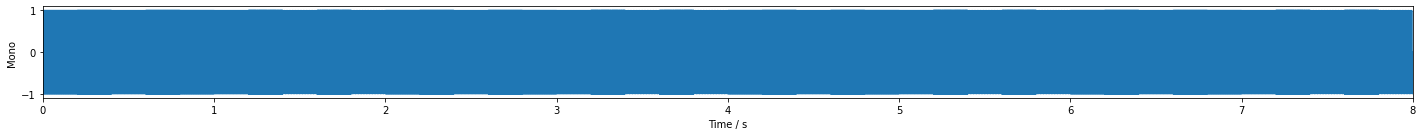

In [3]:
sample_rate = 44100  # Sample rate in Hz
buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate, encoder=wavestacker.AmplitudeEncoder_unsignedchar())
buffer.add_audio_data(y)
print(buffer)
print(buffer.encoder.bits_per_sample, buffer.sample_rate)
fig, axs = buffer.plot()
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (sample rate=22000Hz), contains 16.04s
8 22000


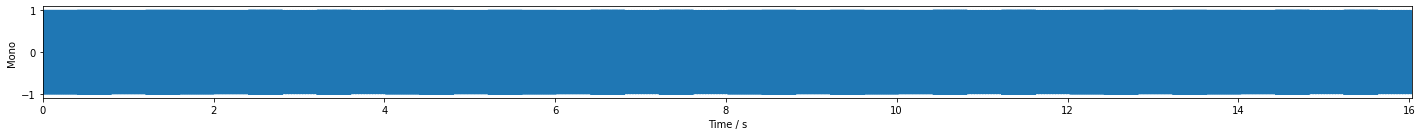

In [4]:
sample_rate = 22000  # Sample rate in Hz
buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate, encoder=wavestacker.AmplitudeEncoder_unsignedchar())
buffer.add_audio_data(y)
print(buffer)
print(buffer.encoder.bits_per_sample, buffer.sample_rate)
fig, axs = buffer.plot()
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (sample rate=11000Hz), contains 32.07s
8 11000


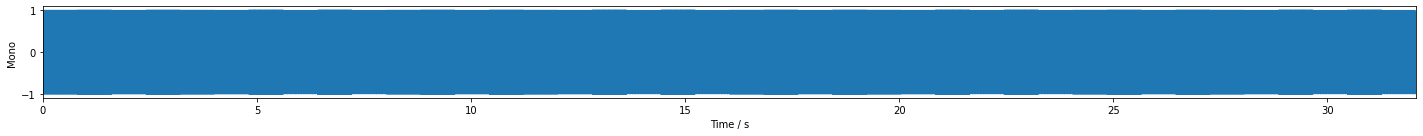

In [5]:
sample_rate = 11000  # Sample rate in Hz
buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate, encoder=wavestacker.AmplitudeEncoder_unsignedchar())
buffer.add_audio_data(y)
print(buffer)
print(buffer.encoder.bits_per_sample, buffer.sample_rate)
fig, axs = buffer.plot()
buffer.play()